In [6]:
import random

class City:
    def __init__(self, city_id, x, y):
        self.city_id = city_id
        self.x = x
        self.y = y

    def distance_to(self, other_city):
        return ((self.x - other_city.x) ** 2 + (self.y - other_city.y) ** 2) ** 0.5

def total_distance(tour):
    return sum(city.distance_to(next_city) for city, next_city in zip(tour, tour[1:]))

def calculate_fitness(tour):
    total_dist = total_distance(tour)
    max_dist = max(city.distance_to(next_city) for city, next_city in zip(tour, tour[1:]))
    min_dist = min(city.distance_to(next_city) for city, next_city in zip(tour, tour[1:]))
    L = max_dist * len(tour)
    D = total_dist
    Delta = max_dist - min_dist
    return -1 * (L * Delta + D)

def is_valid_tour(tour, cities):
    # Her şehire bir kez gidilip gidilmediğini kontrol et
    if len(set(city.city_id for city in tour)) != len(cities):
        return False

    # İlk ve son şehirleri ekleyelim
    tour = [cities[0]] + tour + [cities[-1]]

    # Yeni kısıtlar
    for i in range(len(tour) - 1):
        current_city_id = tour[i].city_id
        next_city_id = tour[i + 1].city_id

        if (current_city_id % 2 == 0 and next_city_id % 2 == 1 and current_city_id < len(cities) / 2) and \
           (current_city_id % 2 == 1 and next_city_id % 2 == 0 and current_city_id >= len(cities) / 2):
            return False

    return True

def crossover(parent1, parent2, cities):
    crossover_point1 = random.randint(0, len(parent1['tour']) - 1)
    crossover_point2 = random.randint(crossover_point1 + 1, len(parent1['tour']))

    child_tour = [None] * len(parent1['tour'])
    child_tour[crossover_point1:crossover_point2] = parent1['tour'][crossover_point1:crossover_point2]

    for i in range(len(parent2['tour'])):
        if parent2['tour'][i] not in child_tour:
            empty_index = child_tour.index(None)
            child_tour[empty_index] = parent2['tour'][i]

    return {'tour': child_tour, 'fitness': None, 'meme': None}

def mutate(individual, mutation_rate, cities):
    if random.random() < mutation_rate:
        mutation_points = random.sample(range(len(individual['tour'])), 2)
        individual['tour'][mutation_points[0]], individual['tour'][mutation_points[1]] = \
            individual['tour'][mutation_points[1]], individual['tour'][mutation_points[0]]

    return individual

def initialize_population(population_size, cities):
    return [{'tour': random.sample(cities, len(cities)), 'fitness': None, 'meme': None} for _ in range(population_size)]

def memetic_algorithm(population_size, cities, generations, mutation_rate):
    start_city = cities[0]
    end_city = cities[-1]
    cities = cities[1:-1]

    population = initialize_population(population_size, cities)

    best_fitness_ever = float('-inf')
    best_tour_ever = None

    initial_random_tour = population[0]['tour'][:]

    for generation in range(generations):
        meme_pool = [individual for individual in population if individual['meme'] is not None]

        if meme_pool:
            best_meme_individual = max(meme_pool, key=lambda x: x['fitness'])
            for individual in population:
                individual['meme'] = best_meme_individual['meme'][:]

        for individual in population:
            current_tour = [start_city] + individual['tour'] + [end_city]
            individual['fitness'] = calculate_fitness(current_tour)

        population.sort(key=lambda x: x['fitness'] if x['fitness'] is not None else float('-inf'), reverse=True)
        elite = population[0]
        new_population = [elite]

        while len(new_population) < population_size:
            parents = random.sample(population, 2)
            child = crossover(parents[0], parents[1], cities)

            if is_valid_tour(child['tour'], cities):
                child = mutate(child, mutation_rate, cities)
                new_population.append(child)

        population = new_population

        current_best_fitness = population[0]['fitness']
        print(f"Iteration {generation + 1}, Best Fitness: {current_best_fitness}")

        if current_best_fitness > best_fitness_ever:
            best_fitness_ever = current_best_fitness
            best_tour_ever = population[0]['tour']

    initial_random_tour_fitness = calculate_fitness([start_city] + initial_random_tour + [end_city])
    print("İlk Rasgele Oluşturulan Tur:", [city.city_id for city in initial_random_tour])
    print("İlk Rasgele Oluşturulan Tur Fitness Değeri:", initial_random_tour_fitness)

    return best_tour_ever




In [7]:
# Şehir verileri
city_data1 = """0,40.8,24.1
1,82,67.7
2,71.9,29
3,96.9,67.2
4,53.2,69.6
5,32.6,6.8
6,10.6,25.5
7,61.1,22.5
8,77.9,66.8
9,42.4,84.5
10,9.1,34.5
11,26.7,78.1
12,15.4,67.6
13,28.2,0.7
14,44.1,60.3
15,52.8,38.7
16,45.8,91.6
17,87.6,0.2
18,51.9,46.3
19,94.4,42.5
20,63.8,46.1
21,95.8,77.1"""
city_data2 = """0,32.3,60.8
1,78.5,45.1
2,47.2,45.9
3,3.6,66.2
4,17.6,77.1
5,72.2,35.1
6,47.4,66.3
7,15.3,41.7
8,34.2,84.2
9,60.8,83.3
10,19.2,25.7
11,73.9,61.4
12,24.3,58.3
13,91.8,54.1
14,27,87
15,76.6,26.5
16,18.9,31.9
17,28.8,12
18,9.2,94
19,57.7,64.6
20,68.4,48
21,54.7,64
22,42.6,54.5
23,64.5,64.8
24,64.8,54.4
25,68,72.2
26,63.6,52.3
27,94.6,99.4
28,20.9,21.9
29,71,10.6
30,23.7,11
31,12,6.4"""
city_data3 = """0,40.5,88.8
1,44.9,39.2
2,36.6,77
3,76.4,39.7
4,62.8,80.9
5,77.2,75.6
6,93.3,37.8
7,97.3,21.7
8,19.3,79.1
9,13.9,95
10,69.7,32.8
11,9.4,67.2
12,52.6,43.9
13,53.1,83.4
14,86.2,76.9
15,48.5,16.8
16,39.4,86.2
17,67.2,99
18,74.2,51.5
19,52.1,88.5
20,34.8,58.9
21,15,15.5
22,58.7,20
23,26.3,40.7
24,4.5,74.9
25,75.5,82.6
26,24.3,79
27,44.3,31.9
28,68.8,53.5
29,36,9
30,73.7,11.2
31,39.5,13.7
32,68.4,67.9
33,70.5,49.6
34,44.3,19
35,2,49.6
36,33.1,14.8
37,42.5,5.5
38,27.1,85.1
39,19.8,56.1
40,82.2,93
41,43,69.7"""
city_data4 = """0,58.3,69.6
1,81.6,50
2,88,53.6
3,98.9,44.6
4,0.1,12.4
5,86.6,49.1
6,61.3,85.3
7,99,87.4
8,52.8,27.1
9,48,20.9
10,80.2,56.5
11,22.8,64.1
12,49.9,41.8
13,90.1,20.6
14,57.5,94.8
15,84.6,8.3
16,73.9,10.6
17,58.6,14.3
18,24.7,16.7
19,66.7,62.1
20,8.4,57.4
21,62.6,5.3
22,66.1,93.2
23,73,72.9
24,89.1,73.8
25,98.3,6.4
26,77,86.1
27,58.2,93.5
28,92.9,98.5
29,58.1,85.9
30,1.7,78.6
31,12.1,51.4
32,86.3,17.8
33,48.5,39.9
34,84.5,13.4
35,21,3.1
36,55.3,94
37,63,30.2
38,3.2,29.6
39,61.5,33.3
40,36.3,46.8
41,5,64.9
42,49,2.6
43,19.3,84.3
44,12.4,56
45,20.6,85.5
46,14.7,34.8
47,19,44.7
48,4.3,5.5
49,63.6,17.8
50,28.2,66.3
51,53.9,33.1"""
city_data5 = """0,89.9,74.7
1,11.9,1.1
2,98.9,4.9
3,54,66.8
4,70.7,60.4
5,100,52.7
6,28.8,73
7,41.5,70.8
8,46.5,78.2
9,76.4,28.8
10,81.9,69.3
11,10.1,55.7
12,17.9,39.7
13,36,6.2
14,5.7,78.1
15,52.2,33.8
16,33.6,60.8
17,17.6,74.2
18,20.9,10.5
19,90.6,12.8
20,67.6,55
21,46.9,48.6
22,91.3,89.1
23,10.5,79.9
24,74.6,73.5
25,73.7,5.2
26,56.2,7.3
27,18.5,8.9
28,59.8,79.9
29,30,94.4
30,13.5,68.4
31,21.3,13.3
32,89.5,72.3
33,7.2,11.1
34,24.3,11.8
35,5.4,64.1
36,44.2,32.9
37,1.4,65.4
38,89.8,75
39,19.7,58.4
40,9.4,74.1
41,30.8,23.5
42,45.7,73.5
43,10.2,97.1
44,99.6,86.7
45,33.3,8.7
46,29.8,36.7
47,6.3,37
48,29.9,68.6
49,4.7,59.8
50,50.6,79
51,76.2,36.8
52,63.2,20.7
53,9,8.7
54,8.1,77.2
55,77.8,20.6
56,90.6,38.9
57,53.4,55.2
58,11,22.9
59,82.6,64.2
60,33.9,48.5
61,29.4,15.2"""


In [8]:
def create_cities(city_data):
    city_lines = city_data.split('\n')
    cities = []

    for line in city_lines:
        city_info = line.split(',')
        city = City(int(city_info[0]), float(city_info[1]), float(city_info[2]))
        cities.append(city)

    return cities

Hangi şehir verisini seçmek istersiniz? (cities_1, cities_2, cities_3, cities_4, cities_5): cities_1
Iteration 1, Best Fitness: -99244.45900256411
Iteration 2, Best Fitness: -85922.24398995
Iteration 3, Best Fitness: -85922.24398995
Iteration 4, Best Fitness: -83636.72573663846
Iteration 5, Best Fitness: -83636.72573663846
Iteration 6, Best Fitness: -81997.9136721274
Iteration 7, Best Fitness: -81997.9136721274
Iteration 8, Best Fitness: -81997.9136721274
Iteration 9, Best Fitness: -81997.9136721274
Iteration 10, Best Fitness: -81997.9136721274
Iteration 11, Best Fitness: -81997.9136721274
Iteration 12, Best Fitness: -81997.9136721274
Iteration 13, Best Fitness: -81997.9136721274
Iteration 14, Best Fitness: -81997.9136721274
Iteration 15, Best Fitness: -81997.9136721274
Iteration 16, Best Fitness: -81997.9136721274
Iteration 17, Best Fitness: -77864.35334284538
Iteration 18, Best Fitness: -73762.12574099761
Iteration 19, Best Fitness: -73748.98464179719
Iteration 20, Best Fitness: -737

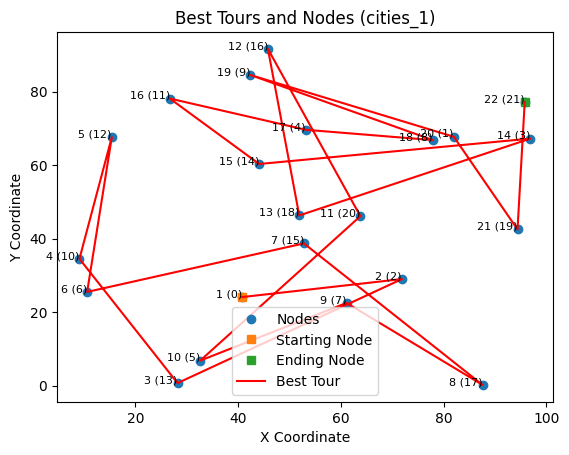

In [24]:
import matplotlib.pyplot as plt

def plot_tour_and_cities(cities, best_tour, selected_city_data):
    x_coords = [city.x for city in cities]
    y_coords = [city.y for city in cities]

    plt.plot(x_coords, y_coords, 'o', label='Nodes')
    plt.plot(x_coords[0], y_coords[0], 's', label='Starting Node')
    plt.plot(x_coords[-1], y_coords[-1], 's', label='Ending Node')

    best_tour_x = [city.x for city in best_tour]
    best_tour_y = [city.y for city in best_tour]

    plt.plot(best_tour_x, best_tour_y, 'r-', label='Best Tour')

    for i, city in enumerate(best_tour):
        plt.text(city.x, city.y, f"{i + 1} ({city.city_id})", fontsize=8, ha='right')

    plt.title(f"Best Tours and Nodes ({selected_city_data})")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

# Ana kod bloğu
cities_dict = {
    'cities_1': create_cities(city_data1),
    'cities_2': create_cities(city_data2),
    'cities_3': create_cities(city_data3),
    'cities_4': create_cities(city_data4),
    'cities_5': create_cities(city_data5)
}

selected_city_data = input("Hangi şehir verisini seçmek istersiniz? (cities_1, cities_2, cities_3, cities_4, cities_5): ")

if selected_city_data in cities_dict:
    cities = cities_dict[selected_city_data]
    population_size = 50
    generations = 1000
    mutation_rate = 0.1
    best_tour = memetic_algorithm(population_size, cities, generations, mutation_rate)
    best_tour = [cities[0]] + best_tour + [cities[-1]]
    best_fitness = calculate_fitness(best_tour)

    print(f"Best Tour ({selected_city_data}):", [city.city_id for city in best_tour])
    print(f"Total Distance ({selected_city_data}):", total_distance(best_tour))
    print(f"Best of Fitness ({selected_city_data}):", best_fitness)

    # Grafik çizdiren fonksiyonu çağır
    plot_tour_and_cities(cities, best_tour, selected_city_data)
else:
    print("Geçersiz şehir verisi seçimi.")
